In [1]:
%load_ext autoreload

In [2]:
from datetime import datetime
from dateutil.tz import tzlocal

import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# expand nested json object
def unnest_json(df, column_name):
    return pd.concat([df, pd.json_normalize(df[column_name]).add_prefix(f'{column_name}_')], axis=1).drop(column_name, axis=1)

# expand nested list
def unnest_list(df, column_name):
    return df.join(pd.DataFrame(df[column_name].tolist(), index=df.index).add_prefix(f'{column_name}_')).drop(columns=[column_name])

# expand helper
def unnest(df):
    type_maps = df.loc[0].apply(type)
    for column in df.columns:
        if type_maps[column] == dict:
            return unnest(unnest_json(df=df, column_name=column))
        elif type_maps[column] == list:
            return unnest(unnest_list(df=df, column_name=column))
    return df

# Data Preprocessing

## City Lists
To clean `city_lists.json`, we have expanded the column `coord` into `lat` and `lon` and convert the data type of `id` from `float64` to `int64` for the final merge.

In [5]:
# read json file into dataframe
city_lists = pd.read_json('city_list.json').rename(columns={'id': 'city_id'})

# clean data
cleaned_city_lists = unnest(city_lists).astype({'city_id': np.int64})

# only return cities in US
final_city_lists = cleaned_city_lists[cleaned_city_lists['country'] == 'US']

# filter out items with state is empty
# us_city_lists = us_city_lists[us_city_lists['state'] != '']

In [6]:
final_city_lists.drop_duplicates(inplace=True)
final_city_lists

<ipython-input-6-4535234adccf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_city_lists.drop_duplicates(inplace=True)


,city_id,name,state,country,coord_lon,coord_lat
141898,4046255,Bay Minette,AL,US,-87.773048,30.882959
141899,4046274,Edna,TX,US,-96.646088,28.978590
141900,4046319,Bayou La Batre,AL,US,-88.248520,30.403521
141901,4046332,Henderson,TX,US,-94.799377,32.153221
141902,4046430,Natalia,TX,US,-98.862534,29.189680
...,...,...,...,...,...,...
208906,8122840,Western Community Park,KS,US,-97.680717,38.367432
208907,8122866,Happy Homes Park,KS,US,-99.976273,37.745800
208908,8123060,Western Mobile Home Park South,KS,US,-100.939072,37.037350
209569,8260172,West Greenwich,RI,US,-71.660042,41.637001


## Weather Samples
To clean `weather_samples.json`, we have unnested the json object and removed useless fields.

In [7]:
# read json file into pandas DataFrame
weather_samples = pd.read_json('weather_samples.json').rename(columns={'id': 'city_id'})

# unnest the json objects or arrays
unnested_weather_samples = unnest(weather_samples)

In [8]:
unnested_weather_samples

,base,visibility,dt,timezone,city_id,name,cod,rain,coord_lon,coord_lat,...,clouds_all,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,weather_0_id,weather_0_main,weather_0_description,weather_0_icon
0,stations,10000,1615097817,-21600,4046255,Bay Minette,200,NaN,-87.7730,30.8830,...,0,3.0,2006393.0,US,1615119032,1615161229,800,Clear,clear sky,01n
1,stations,10000,1615097819,-21600,4046274,Edna,200,NaN,-96.6461,28.9786,...,43,3.0,2008163.0,US,1615121110,1615163410,802,Clouds,scattered clouds,03n
2,stations,10000,1615097821,-21600,4046319,Bayou La Batre,200,NaN,-88.2485,30.4035,...,1,1.0,5398.0,US,1615119133,1615161356,800,Clear,clear sky,01n
3,stations,10000,1615097823,-21600,4046332,Henderson,200,NaN,-94.7994,32.1532,...,1,1.0,5656.0,US,1615120751,1615162882,800,Clear,clear sky,01n
4,stations,10000,1615097824,-21600,4046430,Natalia,200,NaN,-98.8625,29.1897,...,1,1.0,3721.0,US,1615121647,1615163936,800,Clear,clear sky,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,stations,10000,1615101428,-18000,4229476,Warner Robins,200,NaN,-83.5999,32.6210,...,1,1.0,6264.0,US,1615118078,1615160180,800,Clear,clear sky,01n
1996,stations,10000,1615101429,-18000,4229517,Warrenton,200,NaN,-82.6621,33.4071,...,1,1.0,4414.0,US,1615117875,1615159933,800,Clear,clear sky,01n
1997,stations,10000,1615101431,-18000,4229546,Washington,200,NaN,-82.7393,33.7368,...,1,1.0,4414.0,US,1615117903,1615159942,800,Clear,clear sky,01n
1998,stations,10000,1615101433,-18000,4229691,Watkinsville,200,NaN,-83.4088,33.8629,...,1,1.0,3252.0,US,1615118067,1615160100,800,Clear,clear sky,01n


In [9]:
unnested_weather_samples.keys()

Index(['base', 'visibility', 'dt', 'timezone', 'city_id', 'name', 'cod',
       'rain', 'coord_lon', 'coord_lat', 'weather_1', 'main_temp',
       'main_feels_like', 'main_temp_min', 'main_temp_max', 'main_pressure',
       'main_humidity', 'main_sea_level', 'main_grnd_level', 'wind_speed',
       'wind_deg', 'wind_gust', 'clouds_all', 'sys_type', 'sys_id',
       'sys_country', 'sys_sunrise', 'sys_sunset', 'weather_0_id',
       'weather_0_main', 'weather_0_description', 'weather_0_icon'],
      dtype='object')

In [10]:
reserve_cols = ['city_id', 'timezone', 'weather_0_main', 'main_temp', 'main_pressure', 'main_humidity']
rename_cols= {'weather_0_main': 'weather', 'main_temp': 'temp', 'main_pressure': 'pressure', 'main_humidity': 'humidity'}
final_weather_samples = unnested_weather_samples[reserve_cols].rename(columns=rename_cols)

In [11]:
final_weather_samples.drop_duplicates(inplace=True)
final_weather_samples

,city_id,timezone,weather,temp,pressure,humidity
0,4046255,-21600,Clear,282.04,1022,55
1,4046274,-21600,Clouds,283.72,1024,87
2,4046319,-21600,Clear,283.22,1024,53
3,4046332,-21600,Clear,277.94,1027,81
4,4046430,-21600,Clear,282.93,1026,66
...,...,...,...,...,...,...
1995,4229476,-18000,Clear,276.31,1023,93
1996,4229517,-18000,Clear,273.15,1024,93
1997,4229546,-18000,Clear,274.15,1024,93
1998,4229691,-18000,Clear,275.44,1023,75


## One call Weather

To clean `one_call_weather.json`, we have only removed useless fields and use the hourly and daily forecasts for some statistical analysis.

In [12]:
# read json file into dataframe
one_call_weather = pd.read_json('one_call_weather.json').rename(columns={'id': 'city_id'})
one_call_weather

,lat,lon,timezone,timezone_offset,current,hourly,daily,city_id,name,state,alerts
0,30.8830,-87.7730,America/Chicago,-21600,"{'dt': 1615381313, 'sunrise': 1615378016, 'sun...","[{'dt': 1615381200, 'temp': 10.75, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615378016, 'su...",4046255,Bay Minette,AL,NaN
1,28.9786,-96.6461,America/Chicago,-21600,"{'dt': 1615381314, 'sunrise': 1615380106, 'sun...","[{'dt': 1615381200, 'temp': 17.06, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615380106, 'su...",4046274,Edna,TX,NaN
2,30.4035,-88.2485,America/Chicago,-21600,"{'dt': 1615381316, 'sunrise': 1615378120, 'sun...","[{'dt': 1615381200, 'temp': 13.59, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615378120, 'su...",4046319,Bayou La Batre,AL,[{'sender_name': 'NWS Mobile (Mobile - Pensaco...
3,32.1532,-94.7994,America/Chicago,-21600,"{'dt': 1615381317, 'sunrise': 1615379726, 'sun...","[{'dt': 1615381200, 'temp': 16.2, 'feels_like'...","[{'dt': 1615399200, 'sunrise': 1615379726, 'su...",4046332,Henderson,TX,[{'sender_name': 'NWS Shreveport (Shreveport)'...
4,29.1897,-98.8625,America/Chicago,-21600,"{'dt': 1615381319, 'sunrise': 1615380642, 'sun...","[{'dt': 1615381200, 'temp': 17.96, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615380642, 'su...",4046430,Natalia,TX,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,32.6210,-83.5999,America/New_York,-18000,"{'dt': 1615384844, 'sunrise': 1615377050, 'sun...","[{'dt': 1615384800, 'temp': 9.93, 'feels_like'...","[{'dt': 1615395600, 'sunrise': 1615377050, 'su...",4229476,Warner Robins,GA,NaN
1996,33.4071,-82.6621,America/New_York,-18000,"{'dt': 1615384846, 'sunrise': 1615376842, 'sun...","[{'dt': 1615384800, 'temp': 9, 'feels_like': 6...","[{'dt': 1615395600, 'sunrise': 1615376842, 'su...",4229517,Warrenton,GA,NaN
1997,33.7368,-82.7393,America/New_York,-18000,"{'dt': 1615384847, 'sunrise': 1615376867, 'sun...","[{'dt': 1615384800, 'temp': 10.91, 'feels_like...","[{'dt': 1615395600, 'sunrise': 1615376867, 'su...",4229546,Washington,GA,NaN
1998,33.8629,-83.4088,America/New_York,-18000,"{'dt': 1615384849, 'sunrise': 1615377030, 'sun...","[{'dt': 1615384800, 'temp': 7.93, 'feels_like'...","[{'dt': 1615395600, 'sunrise': 1615377030, 'su...",4229691,Watkinsville,GA,NaN


In [14]:
one_call_weather_reserve_cols = ['city_id', 'name', 'current', 'hourly', 'daily']
final_one_call_weather = one_call_weather[one_call_weather_reserve_cols]
final_one_call_weather

,city_id,name,current,hourly,daily
0,4046255,Bay Minette,"{'dt': 1615381313, 'sunrise': 1615378016, 'sun...","[{'dt': 1615381200, 'temp': 10.75, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615378016, 'su..."
1,4046274,Edna,"{'dt': 1615381314, 'sunrise': 1615380106, 'sun...","[{'dt': 1615381200, 'temp': 17.06, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615380106, 'su..."
2,4046319,Bayou La Batre,"{'dt': 1615381316, 'sunrise': 1615378120, 'sun...","[{'dt': 1615381200, 'temp': 13.59, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615378120, 'su..."
3,4046332,Henderson,"{'dt': 1615381317, 'sunrise': 1615379726, 'sun...","[{'dt': 1615381200, 'temp': 16.2, 'feels_like'...","[{'dt': 1615399200, 'sunrise': 1615379726, 'su..."
4,4046430,Natalia,"{'dt': 1615381319, 'sunrise': 1615380642, 'sun...","[{'dt': 1615381200, 'temp': 17.96, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615380642, 'su..."
...,...,...,...,...,...
1995,4229476,Warner Robins,"{'dt': 1615384844, 'sunrise': 1615377050, 'sun...","[{'dt': 1615384800, 'temp': 9.93, 'feels_like'...","[{'dt': 1615395600, 'sunrise': 1615377050, 'su..."
1996,4229517,Warrenton,"{'dt': 1615384846, 'sunrise': 1615376842, 'sun...","[{'dt': 1615384800, 'temp': 9, 'feels_like': 6...","[{'dt': 1615395600, 'sunrise': 1615376842, 'su..."
1997,4229546,Washington,"{'dt': 1615384847, 'sunrise': 1615376867, 'sun...","[{'dt': 1615384800, 'temp': 10.91, 'feels_like...","[{'dt': 1615395600, 'sunrise': 1615376867, 'su..."
1998,4229691,Watkinsville,"{'dt': 1615384849, 'sunrise': 1615377030, 'sun...","[{'dt': 1615384800, 'temp': 7.93, 'feels_like'...","[{'dt': 1615395600, 'sunrise': 1615377030, 'su..."


## Merge

We merge all the processed dataframes on the `city_id` key while validating there is one-to-one relationship before merging, meaning that there are no duplicates.

In [15]:
merge_df = pd.merge(final_city_lists, final_weather_samples, on="city_id", validate="one_to_one")
final_df = pd.merge(merge_df, final_one_call_weather, on="city_id", validate="one_to_one")
final_df

,city_id,name_x,state,country,coord_lon,coord_lat,timezone,weather,temp,pressure,humidity,name_y,current,hourly,daily
0,4046255,Bay Minette,AL,US,-87.773048,30.882959,-21600,Clear,282.04,1022,55,Bay Minette,"{'dt': 1615381313, 'sunrise': 1615378016, 'sun...","[{'dt': 1615381200, 'temp': 10.75, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615378016, 'su..."
1,4046274,Edna,TX,US,-96.646088,28.978590,-21600,Clouds,283.72,1024,87,Edna,"{'dt': 1615381314, 'sunrise': 1615380106, 'sun...","[{'dt': 1615381200, 'temp': 17.06, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615380106, 'su..."
2,4046319,Bayou La Batre,AL,US,-88.248520,30.403521,-21600,Clear,283.22,1024,53,Bayou La Batre,"{'dt': 1615381316, 'sunrise': 1615378120, 'sun...","[{'dt': 1615381200, 'temp': 13.59, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615378120, 'su..."
3,4046332,Henderson,TX,US,-94.799377,32.153221,-21600,Clear,277.94,1027,81,Henderson,"{'dt': 1615381317, 'sunrise': 1615379726, 'sun...","[{'dt': 1615381200, 'temp': 16.2, 'feels_like'...","[{'dt': 1615399200, 'sunrise': 1615379726, 'su..."
4,4046430,Natalia,TX,US,-98.862534,29.189680,-21600,Clear,282.93,1026,66,Natalia,"{'dt': 1615381319, 'sunrise': 1615380642, 'sun...","[{'dt': 1615381200, 'temp': 17.96, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615380642, 'su..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,4229476,Warner Robins,GA,US,-83.599899,32.620979,-18000,Clear,276.31,1023,93,Warner Robins,"{'dt': 1615384844, 'sunrise': 1615377050, 'sun...","[{'dt': 1615384800, 'temp': 9.93, 'feels_like'...","[{'dt': 1615395600, 'sunrise': 1615377050, 'su..."
1994,4229517,Warrenton,GA,US,-82.662079,33.407082,-18000,Clear,273.15,1024,93,Warrenton,"{'dt': 1615384846, 'sunrise': 1615376842, 'sun...","[{'dt': 1615384800, 'temp': 9, 'feels_like': 6...","[{'dt': 1615395600, 'sunrise': 1615376842, 'su..."
1995,4229546,Washington,GA,US,-82.739311,33.736790,-18000,Clear,274.15,1024,93,Washington,"{'dt': 1615384847, 'sunrise': 1615376867, 'sun...","[{'dt': 1615384800, 'temp': 10.91, 'feels_like...","[{'dt': 1615395600, 'sunrise': 1615376867, 'su..."
1996,4229691,Watkinsville,GA,US,-83.408768,33.862900,-18000,Clear,275.44,1023,75,Watkinsville,"{'dt': 1615384849, 'sunrise': 1615377030, 'sun...","[{'dt': 1615384800, 'temp': 7.93, 'feels_like'...","[{'dt': 1615395600, 'sunrise': 1615377030, 'su..."


In [16]:
final_df.keys()

Index(['city_id', 'name_x', 'state', 'country', 'coord_lon', 'coord_lat',
       'timezone', 'weather', 'temp', 'pressure', 'humidity', 'name_y',
       'current', 'hourly', 'daily'],
      dtype='object')

In [17]:
reserve_cols = ['city_id', 'name_x', 'country', 'coord_lon', 'coord_lat', 'timezone', 'current', 'hourly', 'daily']
rename_cols = {'name_x': 'name', 'coord_lon': 'lon', 'coord_lat': 'lat'}
final_df = final_df[reserve_cols].rename(columns=rename_cols)
final_df

,city_id,name,country,lon,lat,timezone,current,hourly,daily
0,4046255,Bay Minette,US,-87.773048,30.882959,-21600,"{'dt': 1615381313, 'sunrise': 1615378016, 'sun...","[{'dt': 1615381200, 'temp': 10.75, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615378016, 'su..."
1,4046274,Edna,US,-96.646088,28.978590,-21600,"{'dt': 1615381314, 'sunrise': 1615380106, 'sun...","[{'dt': 1615381200, 'temp': 17.06, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615380106, 'su..."
2,4046319,Bayou La Batre,US,-88.248520,30.403521,-21600,"{'dt': 1615381316, 'sunrise': 1615378120, 'sun...","[{'dt': 1615381200, 'temp': 13.59, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615378120, 'su..."
3,4046332,Henderson,US,-94.799377,32.153221,-21600,"{'dt': 1615381317, 'sunrise': 1615379726, 'sun...","[{'dt': 1615381200, 'temp': 16.2, 'feels_like'...","[{'dt': 1615399200, 'sunrise': 1615379726, 'su..."
4,4046430,Natalia,US,-98.862534,29.189680,-21600,"{'dt': 1615381319, 'sunrise': 1615380642, 'sun...","[{'dt': 1615381200, 'temp': 17.96, 'feels_like...","[{'dt': 1615399200, 'sunrise': 1615380642, 'su..."
...,...,...,...,...,...,...,...,...,...
1993,4229476,Warner Robins,US,-83.599899,32.620979,-18000,"{'dt': 1615384844, 'sunrise': 1615377050, 'sun...","[{'dt': 1615384800, 'temp': 9.93, 'feels_like'...","[{'dt': 1615395600, 'sunrise': 1615377050, 'su..."
1994,4229517,Warrenton,US,-82.662079,33.407082,-18000,"{'dt': 1615384846, 'sunrise': 1615376842, 'sun...","[{'dt': 1615384800, 'temp': 9, 'feels_like': 6...","[{'dt': 1615395600, 'sunrise': 1615376842, 'su..."
1995,4229546,Washington,US,-82.739311,33.736790,-18000,"{'dt': 1615384847, 'sunrise': 1615376867, 'sun...","[{'dt': 1615384800, 'temp': 10.91, 'feels_like...","[{'dt': 1615395600, 'sunrise': 1615376867, 'su..."
1996,4229691,Watkinsville,US,-83.408768,33.862900,-18000,"{'dt': 1615384849, 'sunrise': 1615377030, 'sun...","[{'dt': 1615384800, 'temp': 7.93, 'feels_like'...","[{'dt': 1615395600, 'sunrise': 1615377030, 'su..."


# Data Analysis

## Visualization

We visualize the change of temperature and weather in our hourly and daily forecasts.

In [18]:
# print out the names of relevant features
for key in final_df.loc[0]['hourly'][0].keys():
    print(key)

dt
temp
feels_like
pressure
humidity
dew_point
uvi
clouds
visibility
wind_speed
wind_deg
weather
pop


In the following temperature plot, we have extracted the first 100 cities and plot the temperature against the time, and we can see that the trends are very similar.

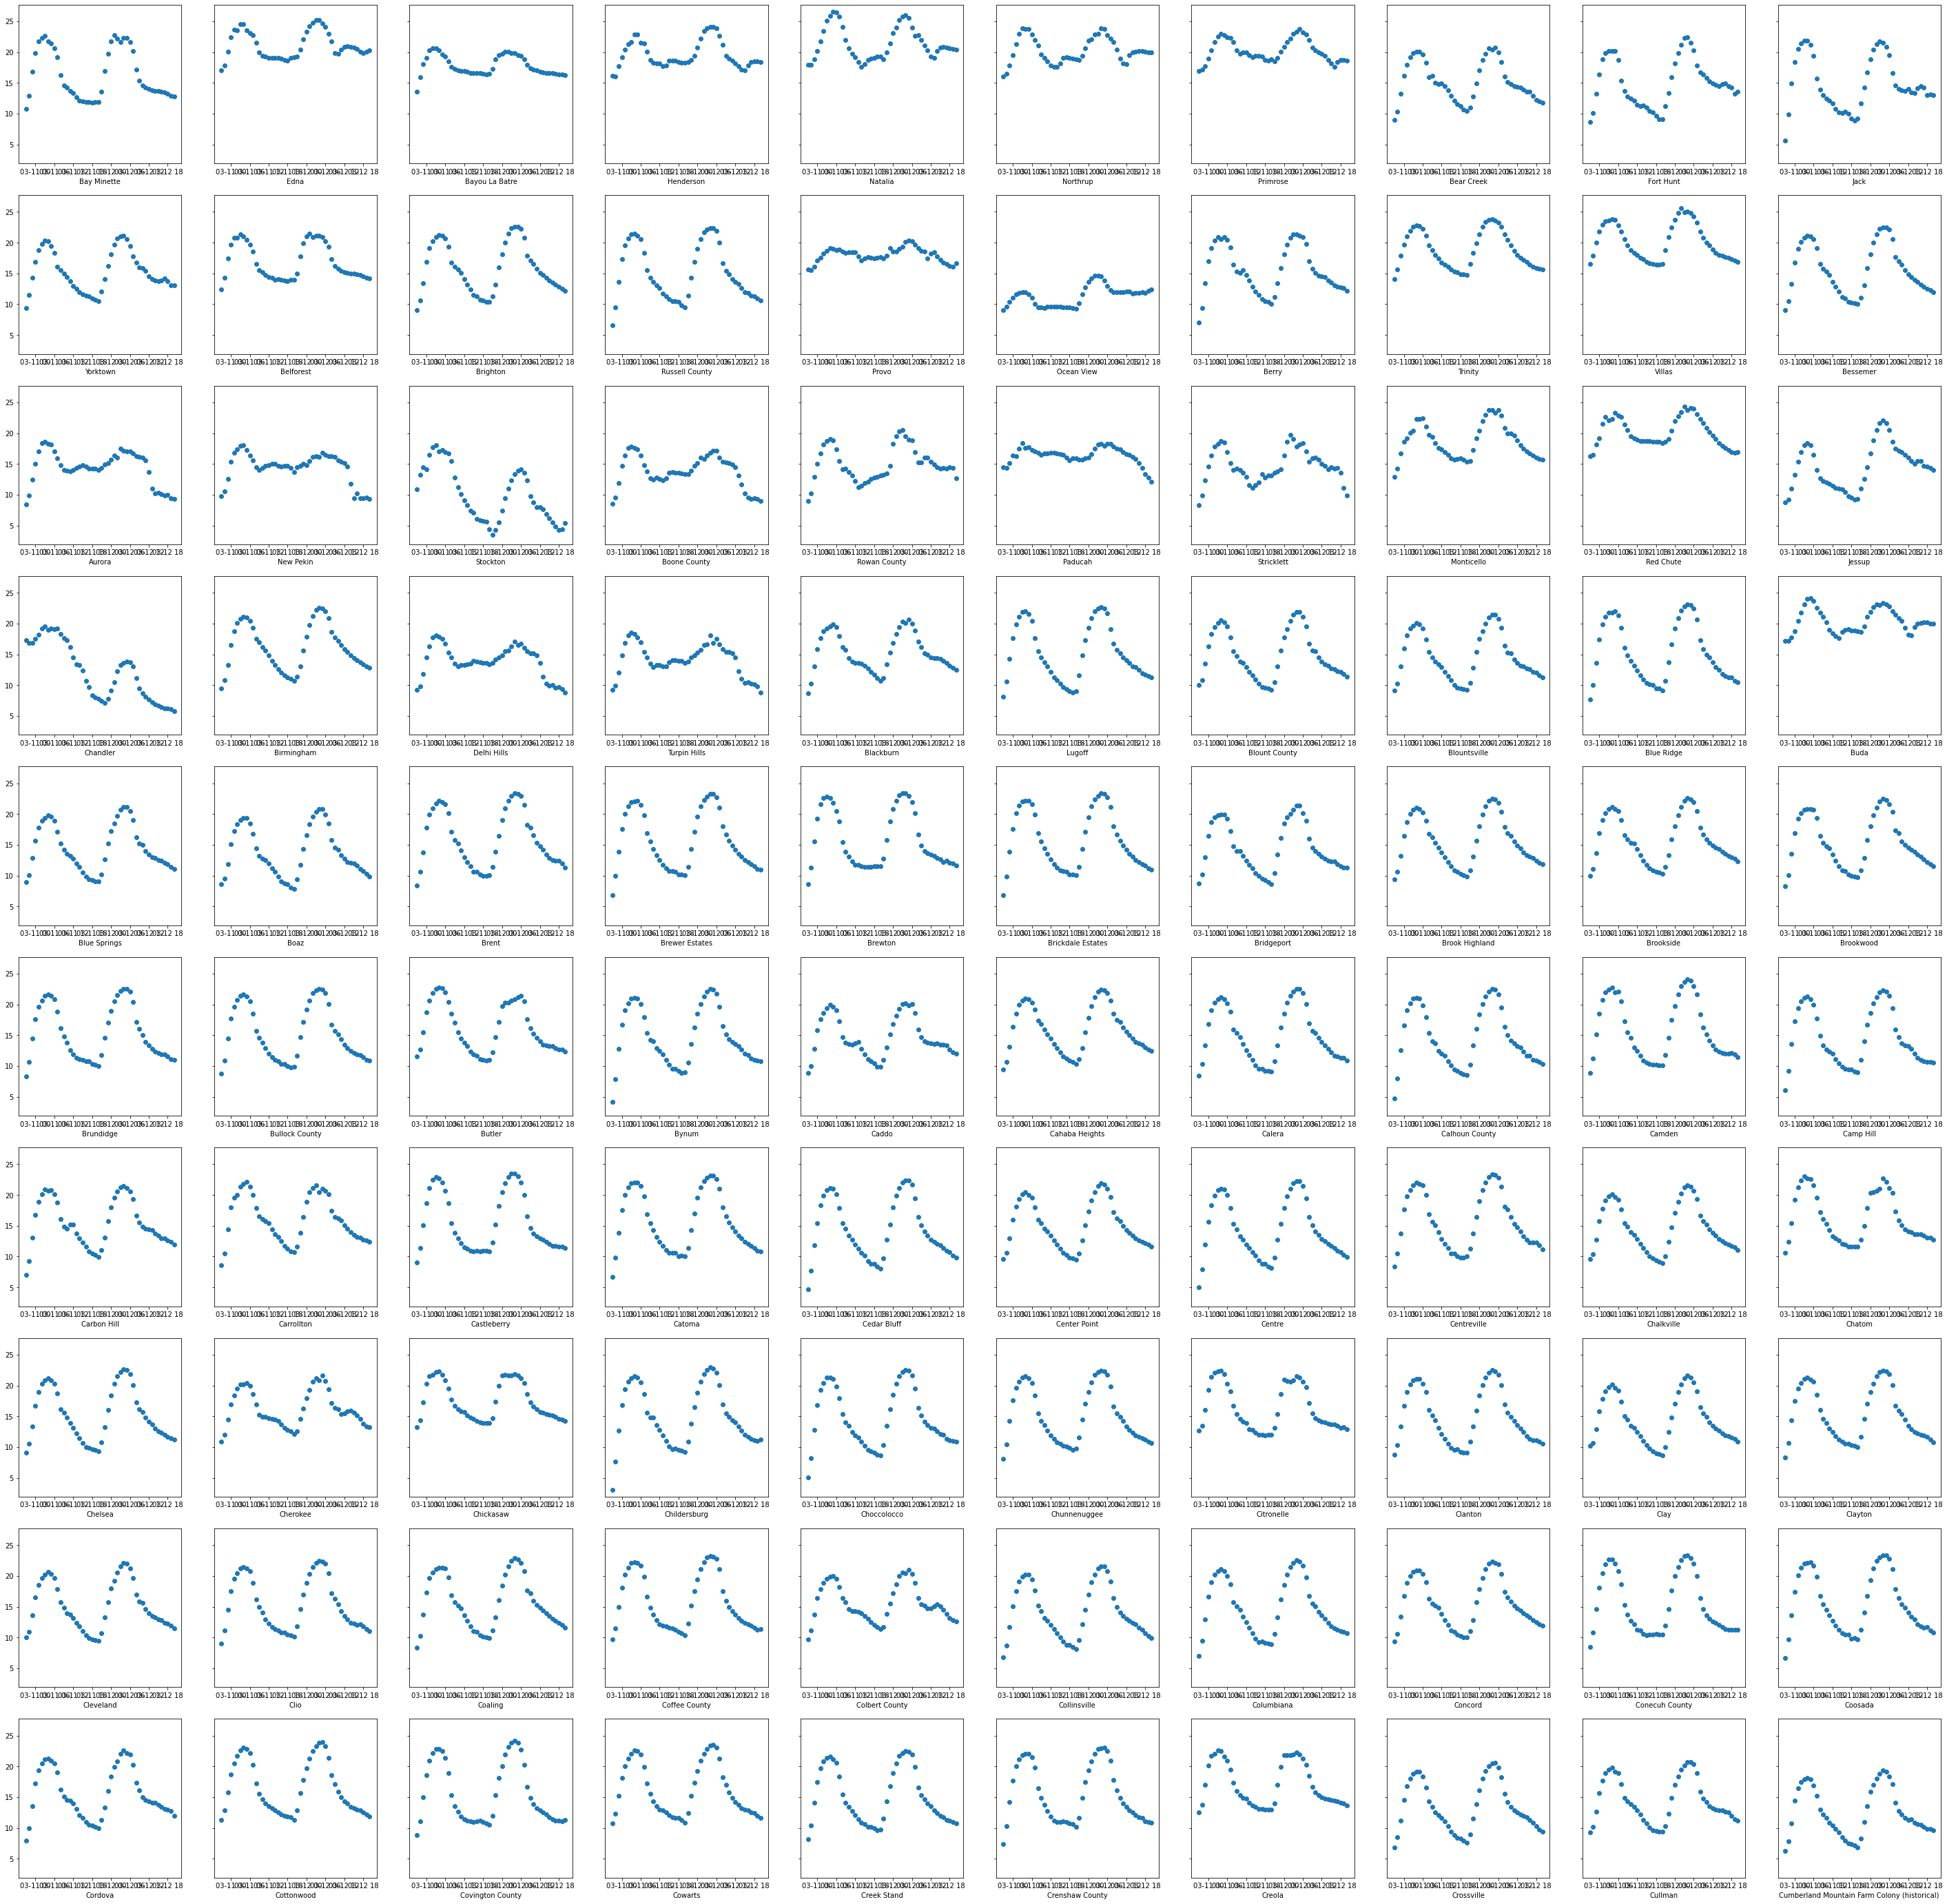

In [23]:
plt.rcParams['figure.figsize'] = [50,50]

fig, axes = plt.subplots(nrows=10, ncols=10, sharey=True)

for city_idx in range(100):
    row = int(city_idx / 10)
    col = city_idx % 10
    stats = final_df.loc[city_idx]['hourly']
    x = [datetime.fromtimestamp(item['dt']) for item in stats]
    y = [item['temp'] for item in stats]
    axes[row, col].plot_date(x, y)
    axes[row, col].set(xlabel=final_df.loc[city_idx]['name'])
plt.show()

For the weather, we have done the same visualization, and we can see that a lot of lines last flat for a long range of consecutive days. That means the current weather is very much related to the weather in a next couple of days.

In [34]:
result = {}
for idx in final_df.index:
    hourly_series = final_df.loc[idx]['hourly']
    y = [item['temp'] for item in hourly_series]
    x = [item['dt'] for item in hourly_series]
    result[final_df.loc[idx]['name']] = pd.DataFrame(y, index=x, columns=['temp'])

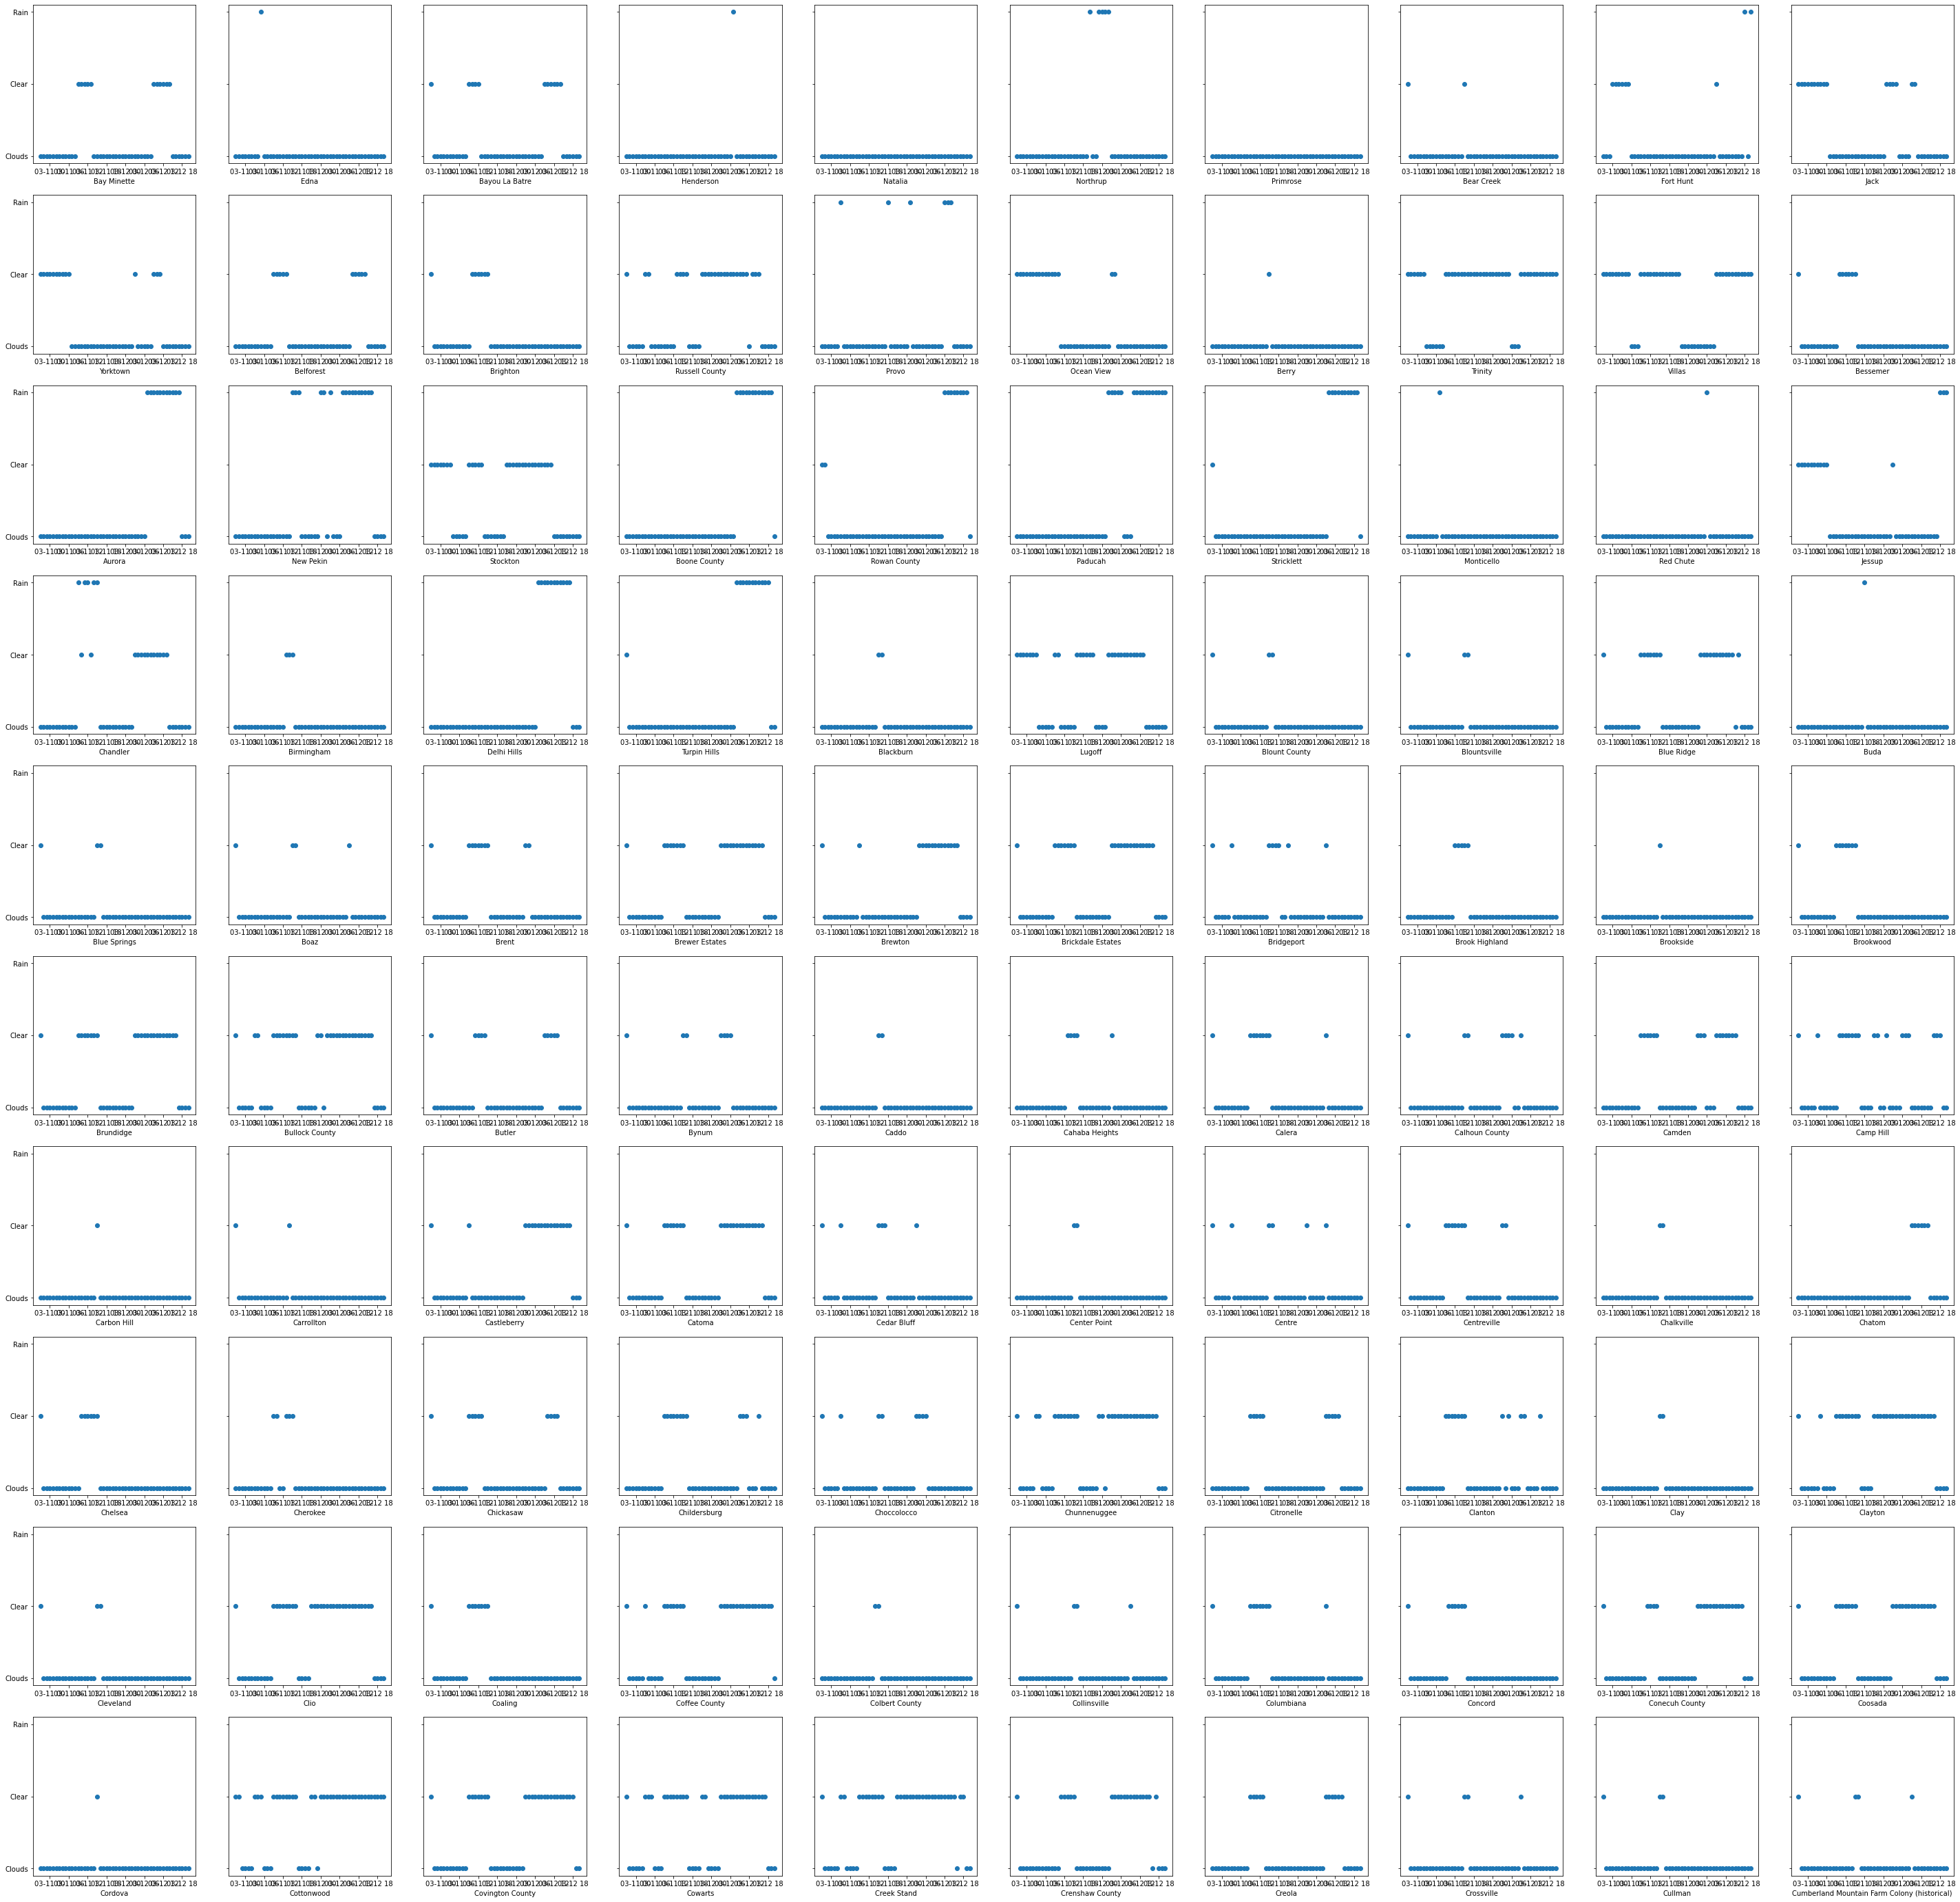

In [91]:
plt.rcParams['figure.figsize'] = [50,50]

fig, axes = plt.subplots(nrows=10, ncols=10, sharey=True)

for city_idx in range(100):
    row = int(city_idx / 10)
    col = city_idx % 10
    stats = final_df.loc[city_idx]['hourly']
    x = [datetime.fromtimestamp(item['dt']) for item in stats]
    y = [item['weather'][0]['main'] for item in stats]
    axes[row, col].plot_date(x, y)
    # axes[row, col] = sns.heatmap(result[final_df.loc[city_idx]['name']].corr(), annot=True, axes=axes[row, col])
    axes[row, col].set(xlabel=final_df.loc[city_idx]['name'])
plt.show()

## Prediction

In the following, we try to fit the current weather data to a linear regression model, using some of the features included in one weather dataframe.

In [44]:
import statsmodels.api as sm

In [50]:
idx = 0
features = ['feels_like', 'pressure', 'dew_point', 'uvi', 'clouds', 'visibility', 'wind_speed', 'wind_deg', 'pop']
predictor = 'temp'

models = []
Xs = []
Ys = []
for idx in final_df.index:
    hourly_series = final_df.loc[idx]['hourly']
    X_lists = []
    for item in hourly_series:
        new_item = []
        for feature in features:
            new_item.append(item[feature])
        X_lists.append(new_item)
    X = pd.DataFrame(X_lists, index=[item['dt'] for item in hourly_series], columns=features)
    Xs.append(X)
    X = sm.add_constant(X)
    Y = pd.DataFrame([item['temp'] for item in hourly_series], index=[item['dt'] for item in hourly_series], columns=['temp'])
    Ys.append(Y)
    model = sm.OLS(Y, X).fit()
    models.append(model)

As shown in the heatmap, most of the features are highly related to temperature, which is the rightmost column.

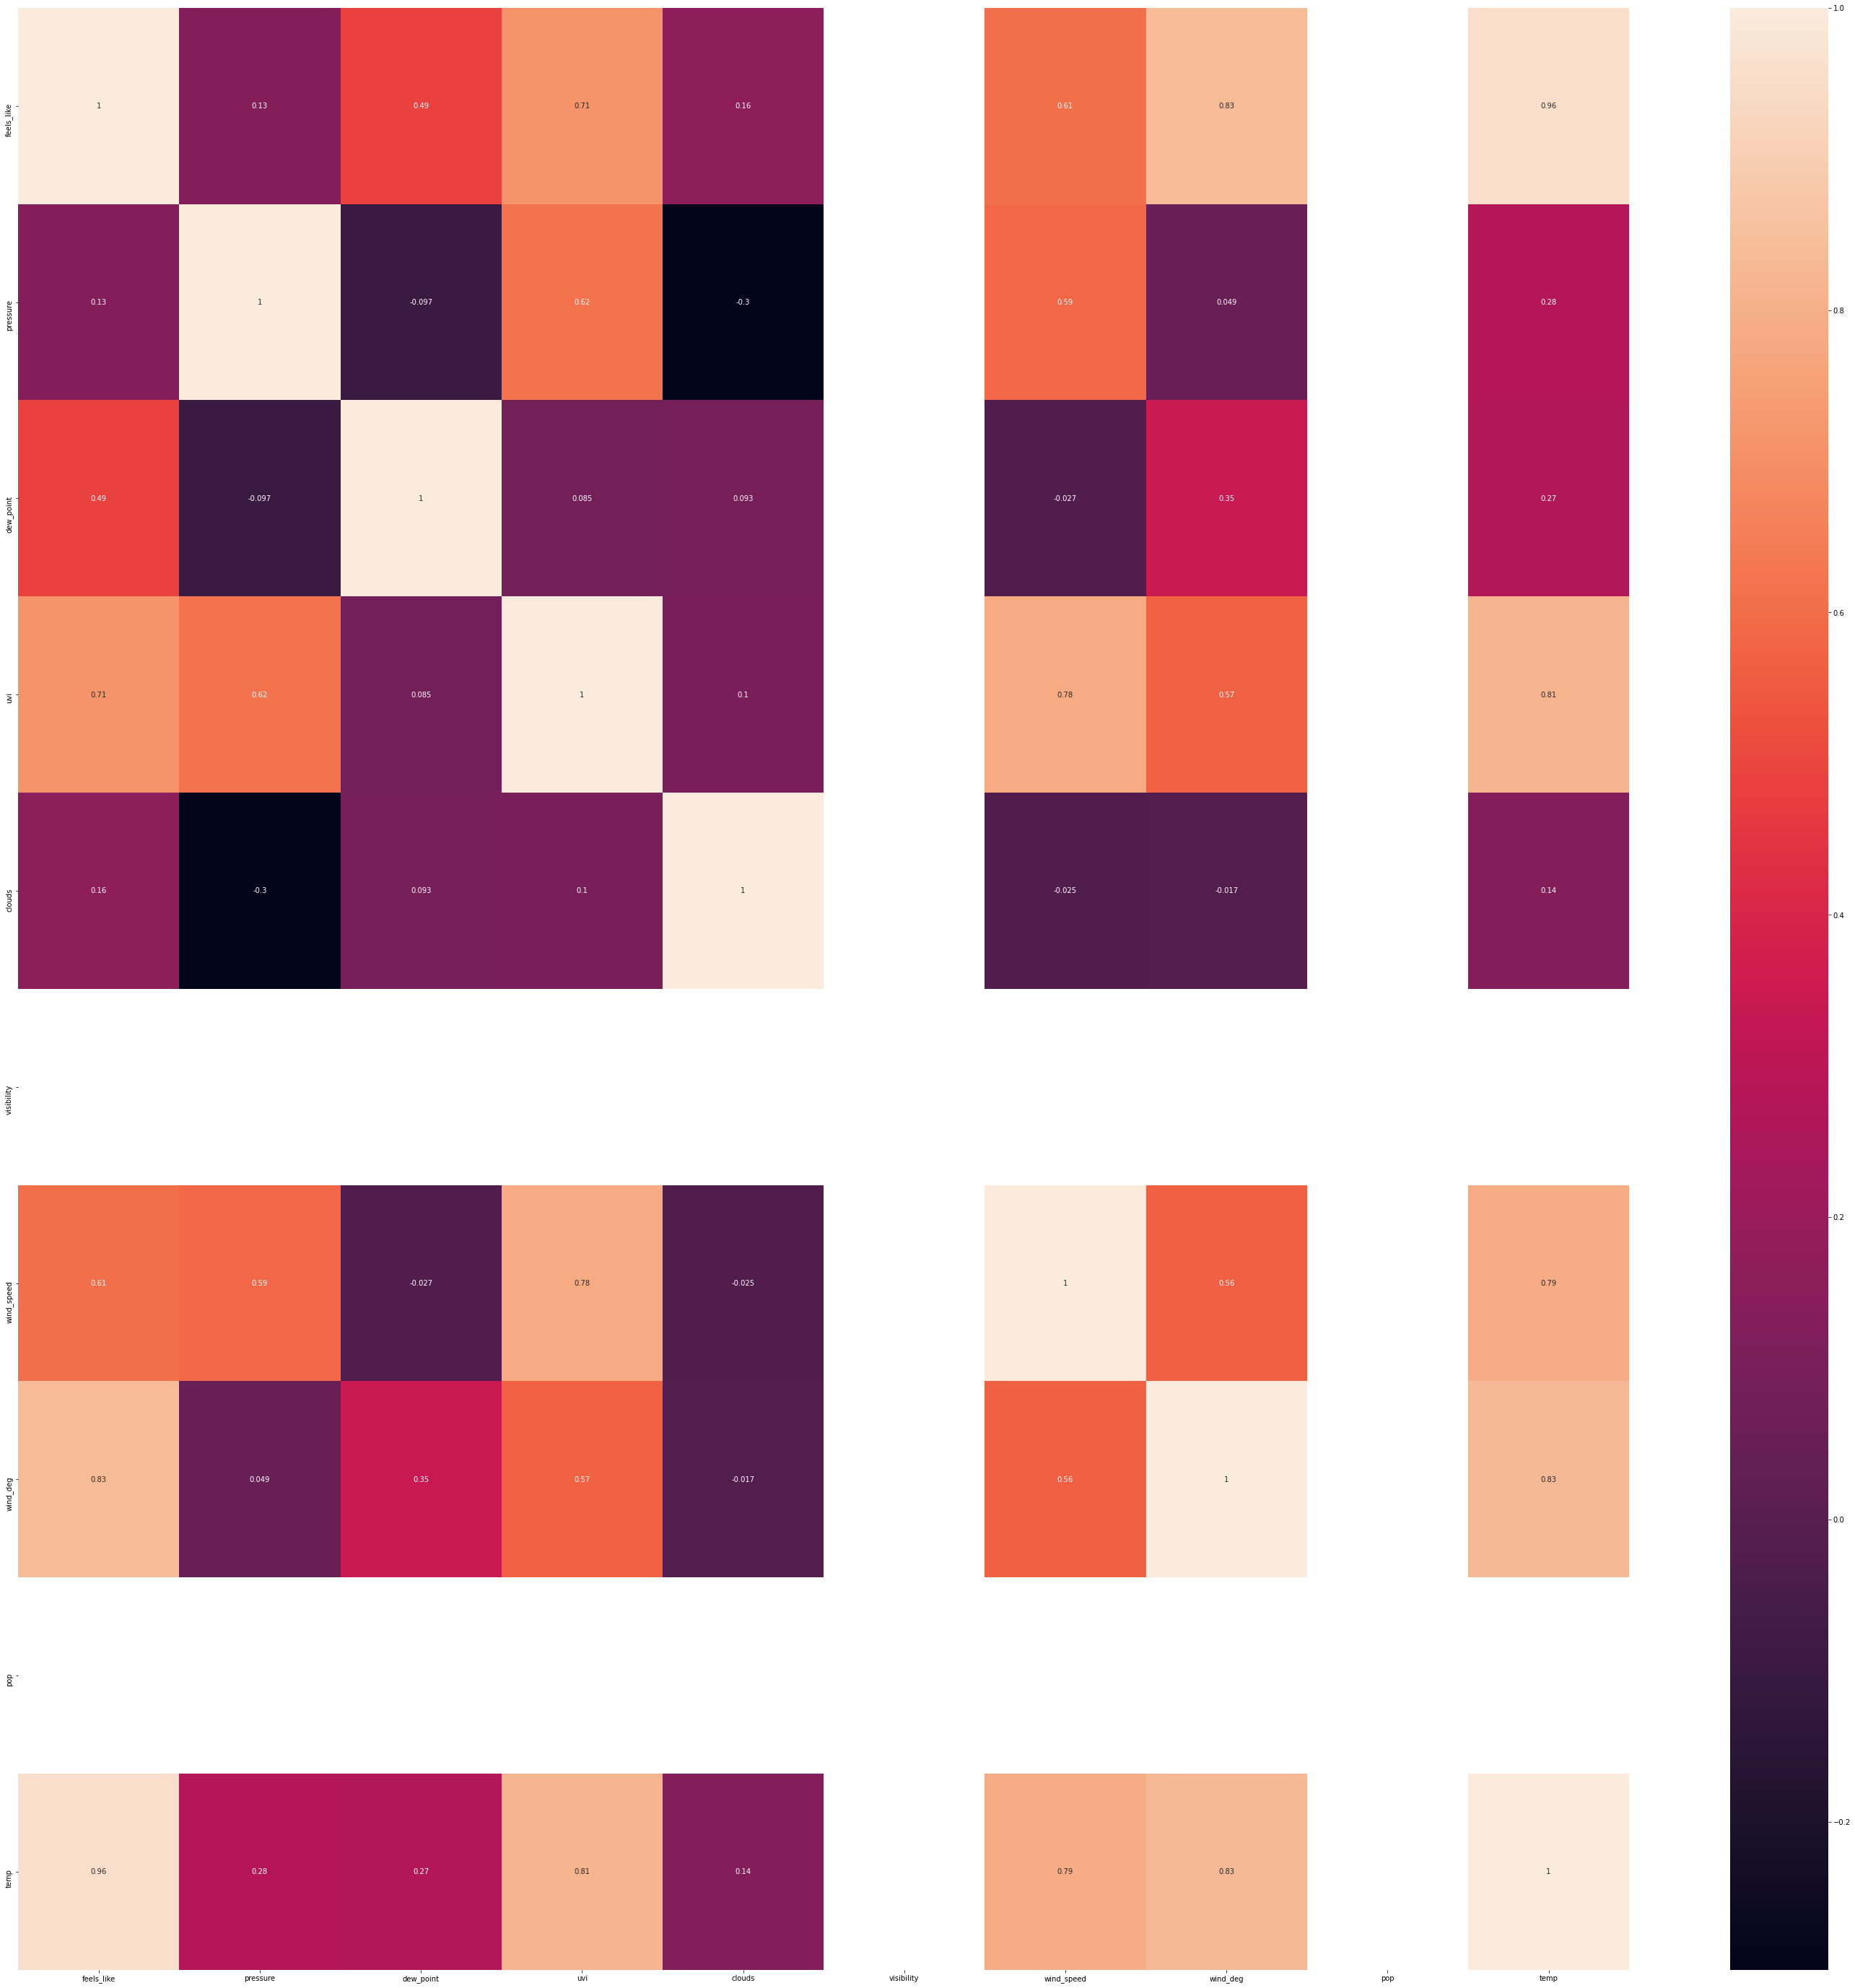

In [86]:
sns.heatmap(Xs[0].join(Ys[0]).corr(), annot=True)
plt.show()

In [51]:
models[0].summary()

/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2129.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           2.35e-49
Time:                        17:37:14   Log-Likelihood:                 7.6289
No. Observations:                  48   AIC:                            0.7422
Df Residuals:                      40   BIC:                             15.71
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feels_like     0.8433      0.024     34.864      0.000       0.794       0.892
pressure       0.0176      0.072      0.244      0.808      -0.128       0.163
dew_point     -0.0736      0.006    -12.350      0.000      -0.086      -0.062
uvi            0.0332      0.044      0.750      0.458      -0.056       0.123
clouds         0.0021      0.001      2.065      0.045    4.55e-05       0.004
visibility    -0.0018      0.007     -0.237      0.814      -0.017       0.013
wind_speed     0.9986      0.065     15.415      0.000       0.868       1.130
wind_deg       0.0077      0.003      2.483      0.017       0.001       0.014
pop                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                       17.187   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.507
Skew:                           0.967   Prob(JB):                     8.73e-08
Kurtosis:                       6.537   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
print(f'mean R-squared: {np.mean([model.rsquared for model in models])}')

mean R-squared: 0.9997731247112888


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error

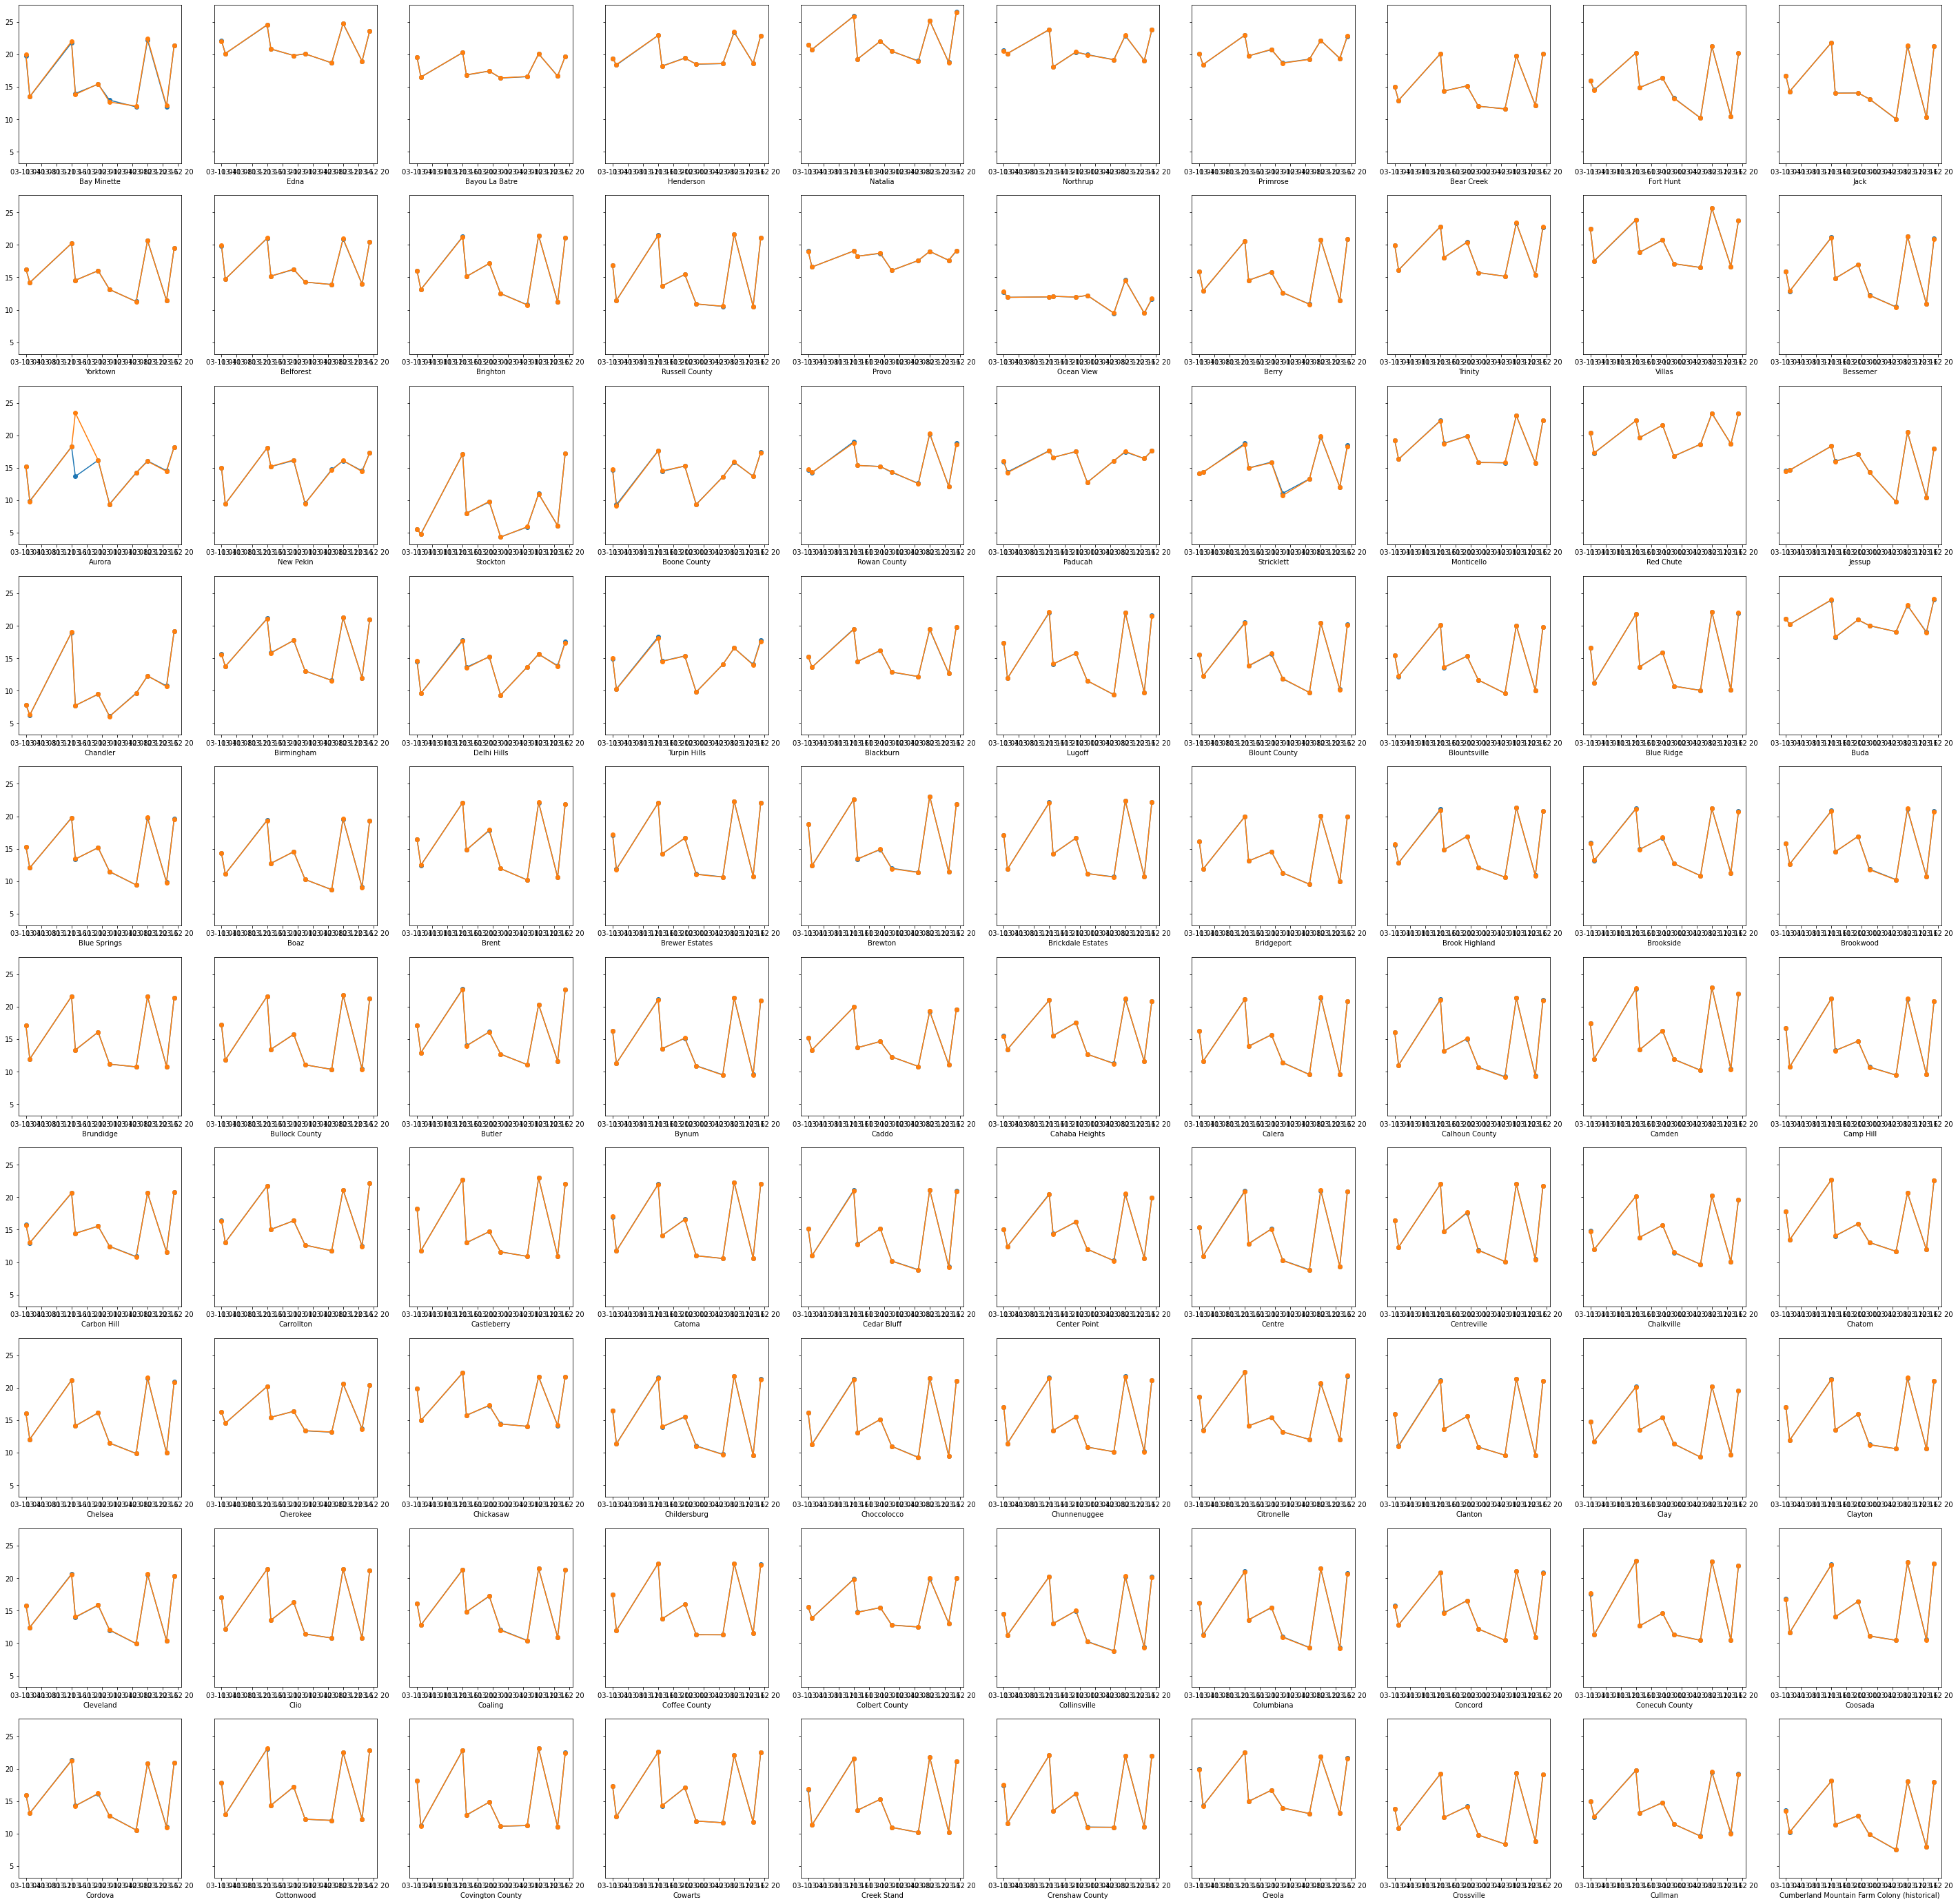

In [74]:
plt.rcParams['figure.figsize'] = [50,50]

fig, axes = plt.subplots(nrows=10, ncols=10, sharey=True)

metrics = []
for city_idx in range(100):
    # split the train and test set
    X_train, X_test, y_train, y_test = train_test_split(Xs[city_idx], Ys[city_idx], test_size=0.2, random_state=12)

    # instantiate the regressor class
    regressor = LinearRegression()

    # fit the build the model by fitting the regressor to the training data
    regressor.fit(X_train, y_train)

    # make a prediction set using the test set
    prediction = regressor.predict(X_test)

    variance = regressor.score(X_test, y_test)
    mean_error = mean_absolute_error(y_test, prediction)
    median_error = median_absolute_error(y_test, prediction)
    metrics.append([variance, mean_error, median_error])
    row = int(city_idx / 10)
    col = city_idx % 10
    time = sorted([datetime.fromtimestamp(t) for t in X_test.index])
    axes[row, col].plot_date(time, y_test['temp'], linestyle='-')
    axes[row, col].plot_date(time, prediction, linestyle='-')
    axes[row, col].set(xlabel=final_df.loc[city_idx]['name'])
plt.show()

In [77]:
metrics_df = pd.DataFrame(metrics, index=final_df.loc[:99]['name'], columns=['Variance', 'Mean Absolute Error', 'Median Absolute Error'])

,Variance,Mean Absolute Error,Median Absolute Error
name,,,
Bay Minette,0.997996,0.160839,0.171316
Edna,0.999800,0.024032,0.017595
Bayou La Batre,0.999861,0.015136,0.015911
Henderson,0.999768,0.024374,0.022252
Natalia,0.999855,0.029705,0.027950
...,...,...,...
Crenshaw County,0.999945,0.027537,0.025839
Creola,0.999976,0.012130,0.009045
Crossville,0.999967,0.018205,0.017346


In [78]:
print(f'average variance: {metrics_df["Variance"].mean()}')
print(f'average mean absolute error: {metrics_df["Mean Absolute Error"].mean()}')
print(f'average median absolute error: {metrics_df["Median Absolute Error"].mean()}')

average variance: 0.9881081988184621
average mean absolute error: 0.040358762514895244
average median absolute error: 0.02705340295312439
